In [ ]:
# Load modules
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the training and testing data.
data           = sio.loadmat('training_and_testing_values.mat')       # Load the testing and training data
x_training     = data['x_training']                                   # ... get the training data,
y_training     = data['y_training']                                   # ... get the spike data,
known_answer = data['correct_answer']
x_testing      = data['x_testing']
y_testing      = data['y_testing']

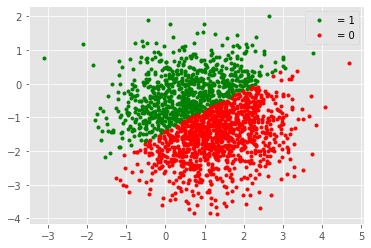

In [3]:
# Plot the training data. What is the line that separates the dots?
plt.plot(x_training[known_answer==1], y_training[known_answer==1], '.g')
plt.plot(x_training[known_answer==0], y_training[known_answer==0], '.r')
legend(['= 1', '= 0']);

In [4]:
# Define our perceptron.
def feedforward(x, y, wx, wy, wb):

  # Fix the bias.
    bias = 1

  # Define the activity of the neuron, activity.
    activity = wx*x + wy*y + wb*bias
  
  # Apply the binary threshold,
    if activity > 0:
        return 1
    else:
        return 0


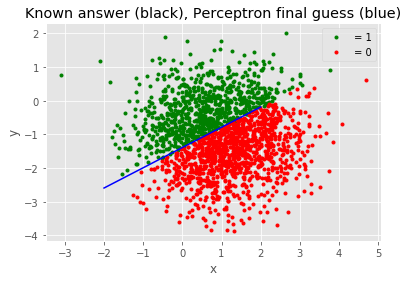

In [6]:
# Train the perceptron.

wx,wy,wb = 3*[0.5];                 # Choose initial values for the perceptron's weights

learning_constant = 0.01;           # And, set the learning constant.

estimated_slope = np.zeros(2000)    # Variables to hold the perceptron estimates.
estimated_intercept = np.zeros(2000)

for k in np.arange(np.size(x_training)):    #**** For each training sample,
    x = x_training[k]                       #**** ... get the x coord,
    y = y_training[k]                       #**** ... and the y coord,
                                    # Step 1: Calculate known answer.
    #*******************************************************************************
    correct_answer = np.int(known_answer[k])#**** Note here the use of "np.int" ****
    #*******************************************************************************
    
                                    # Step 2. Ask perceptron to guess an answer.
    perceptron_guess = feedforward(x, y, wx, wy, wb);
    
                                    # Step 3. Compute the error.
    error = correct_answer - perceptron_guess;
    
                                    # Step 4. Adjust weights according to error.
    wx = wx + error*x*learning_constant;
    wy = wy + error*y*learning_constant;
    wb = wb + error*1*learning_constant;
     
    estimated_slope[k] = -wx/wy;    # Compute estimated slope from perceptron.
    estimated_intercept[k] = -wb/wy;# Compute estimated intercept from perceptron.

# Display the results! ------------------------------------------------------------------------
x_range = np.linspace(-2,2,100);                  # For a range of x-values,

plt.plot(x_training[known_answer==1], y_training[known_answer==1], '.g')
plt.plot(x_training[known_answer==0], y_training[known_answer==0], '.r')
legend(['= 1', '= 0']);

plt.plot(x_range, estimated_slope[-1]*x_range+estimated_intercept[-1], 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Known answer (black), Perceptron final guess (blue)');

In [7]:
np.size(x_training)

2000